In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import datetime

In [15]:
dataset = pd.read_csv('TSLA.csv',index_col="Date",parse_dates=True)

In [16]:
dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [17]:
dataset.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

<Axes: xlabel='Date'>

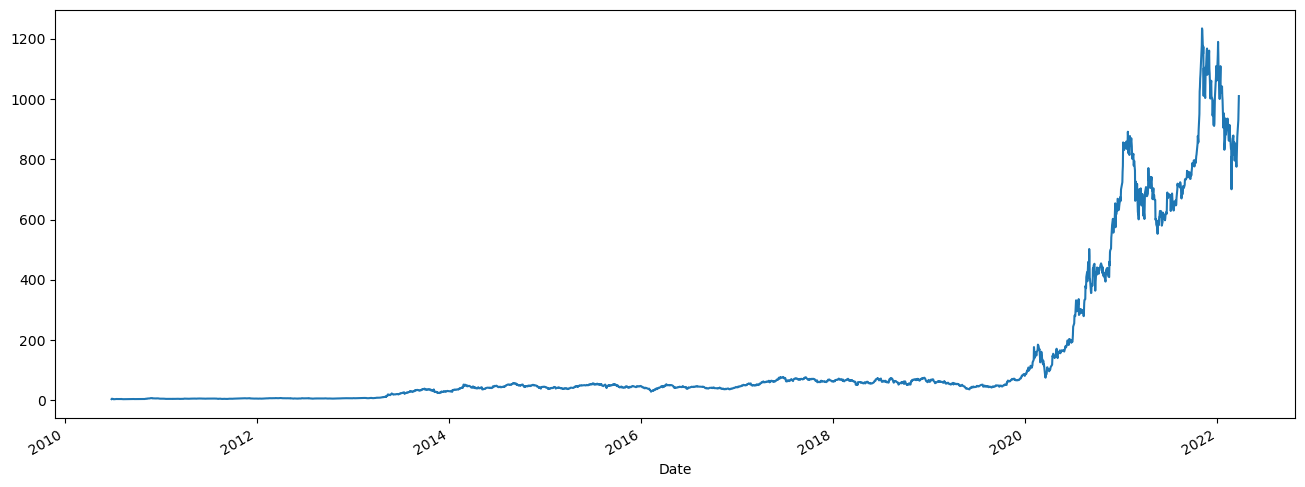

In [18]:
dataset['Open'].plot(figsize=(16,6))

In [19]:
dataset.rolling(10).mean().head(20)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-30,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-12,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Date'>

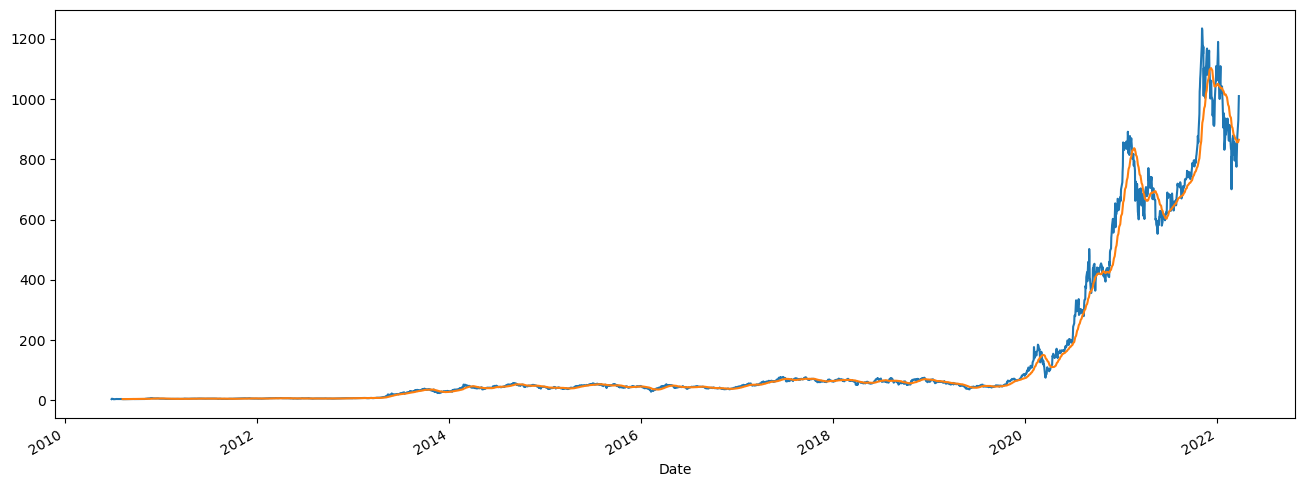

In [20]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

<Axes: xlabel='Date'>

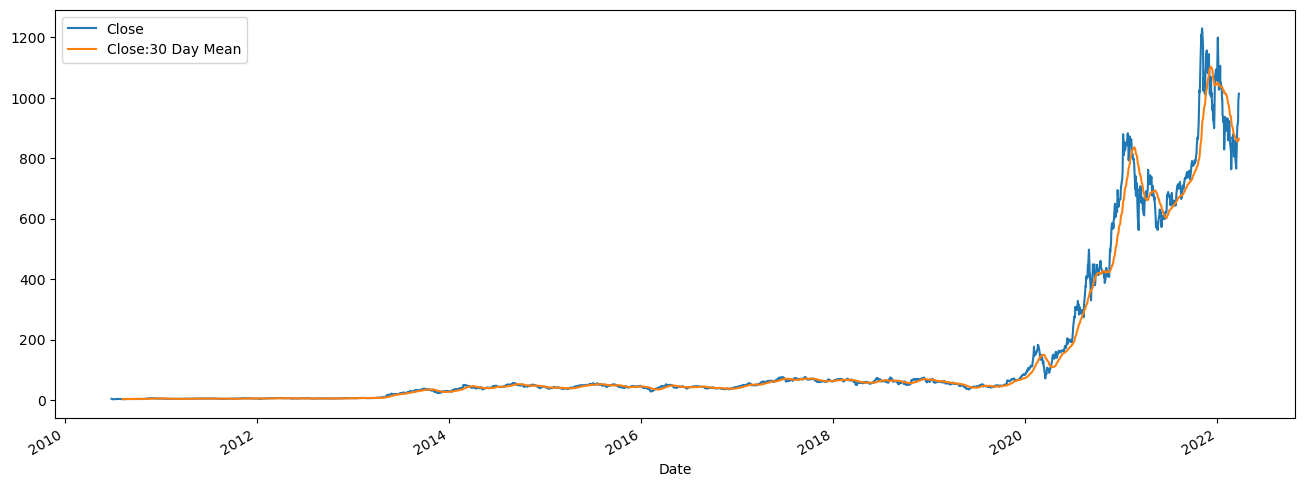

In [21]:
dataset['Close:30 Day Mean'] =dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close:30 Day Mean']].plot(figsize=(16,6))

In [24]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

In [25]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range = (0,1))
training_set_scaled=sc.fit_transform(training_set)

In [26]:
#creating a data struct. with 60 timesteps & 1 output
x_train=[]
y_train=[]
for i in range(60,1258):
        x_train.append(training_set_scaled[i-60:i, 0])
        y_train.append(training_set_scaled[i, 0])
    
x_train,y_train=np.array(x_train),np.array(y_train)

#reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [27]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [28]:
# BUilding a RNN  
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [29]:
#Initialising RNN
regressor = Sequential()

In [31]:
#Adding the first LSTM Layer & some Dropout regularistion
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))

#Adding the second LSTM Layer & some Dropout regularistion
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the third LSTM Layer & some Dropout regularistion
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the fourth LSTM Layer & some Dropout regularistion
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding output layer
regressor.add(Dense(units = 1))

In [34]:
# compiling the RNN
regressor.compile(optimizer = 'adam', loss ='mean_squared_error')

# fitting the RNN to training set
regressor.fit(x_train , y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 112ms/step - loss: 1.5835e-04
Epoch 2/100
38/38 [==============================] - 4s 111ms/step - loss: 1.4503e-05
Epoch 3/100
38/38 [==============================] - 4s 113ms/step - loss: 1.0422e-05
Epoch 4/100
38/38 [==============================] - 4s 113ms/step - loss: 9.6914e-06
Epoch 5/100
38/38 [==============================] - 4s 114ms/step - loss: 9.5154e-06
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 1.0235e-05
Epoch 7/100
38/38 [==============================] - 4s 114ms/step - loss: 8.7104e-06
Epoch 8/100
38/38 [==============================] - 4s 113ms/step - loss: 8.4947e-06
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 8.5416e-06
Epoch 10/100
38/38 [==============================] - 4s 114ms/step - loss: 7.8278e-06
Epoch 11/100
38/38 [==============================] - 4s 113ms/step - loss: 8.5104e-06
Epoch 12/100
38/38 [==============================]

38/38 [==============================] - 5s 120ms/step - loss: 4.8273e-06
Epoch 96/100
38/38 [==============================] - 3s 88ms/step - loss: 4.6514e-06
Epoch 97/100
38/38 [==============================] - 2s 59ms/step - loss: 5.3533e-06
Epoch 98/100
38/38 [==============================] - 3s 87ms/step - loss: 3.9473e-06
Epoch 99/100
38/38 [==============================] - 5s 120ms/step - loss: 6.8957e-06
Epoch 100/100
38/38 [==============================] - 5s 123ms/step - loss: 4.6302e-06


In [41]:
# part 3 making the prediction & visualising the result

# Testing the model by 2021 stock price
dataset_test=pd.read_csv('TSLA_Test.csv',index_col="Date",parse_dates=True)

C:\Users\MAAN\AppData\Local\Temp\ipykernel_21496\2135717664.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataset_test=pd.read_csv('TSLA_Test.csv',index_col="Date",parse_dates=True)


In [42]:
real_stock_price =dataset_test.iloc[:,1:2].values

In [44]:
dataset_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
NaT,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-01-07,5.000,5.184,4.054,4.392,4.392,41094000
2010-02-07,4.600,4.620,3.742,3.840,3.840,25699000
2010-06-07,4.000,4.000,3.166,3.222,3.222,34334500


In [47]:
test_set=dataset_test['Open']
test_set=pd.DataFrame(test_set)

In [50]:
#Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis=0)
inputs=dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

x_test= []
for i in range(60, 80):
    x_test.append(inputs [i-60:i, 0])
x_test =np.array(x_test) 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price =regressor.predict(x_test)
predicted_stock_price =sc.inverse_transform(predicted_stock_price)

C:\Users\MAAN\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 3s 3s/step


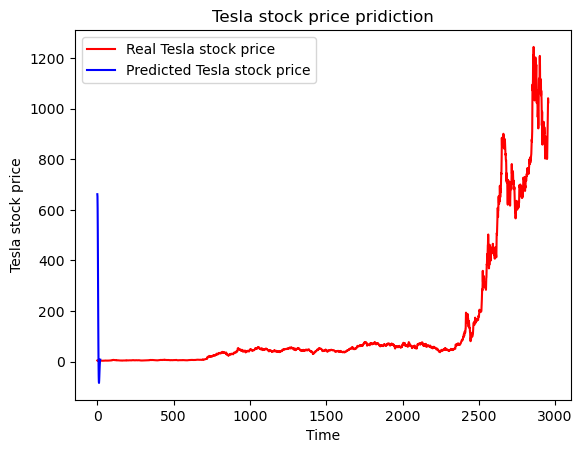

In [51]:
plt.plot(real_stock_price, color='red', label='Real Tesla stock price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Tesla stock price')
plt.title("Tesla stock price pridiction")
plt.xlabel('Time')
plt.ylabel('Tesla stock price')
plt.legend()
plt.show()